Part I: Research Question

A.  Describe the purpose of this data mining report by doing the following:

A1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).

The purpose of this task is to try and use dimensionality reduction methods to help answer a research question. My research question for this project will be if we can use PCA to analyze the dataset to gain a better understanding of our patients.


A2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The ultimate goal of this performance assessment is to reduce the dimensionality of the dataset to gain a better understanding of our patients. This can hopefully lead to better decision-making for the hospital. 

Part II: Method Justification

B.  Explain the reasons for using PCA by doing the following:

B1.  Explain how PCA analyzes the selected data set. Include expected outcomes.

PCA is a way we can reduce dimensions within a dataset. This can be done through feature elimination or extraction. Elimination is just that, it removes features that are redundant or have no correlation to the dependent variable. Extraction involves combining multiple features into one datapoint. This new datapoint is then evaluated to determine how important it is by how it effects the variance within the dataset. Components that explain the most variance are considered important and those are kept. We can evaluate what to keep by using a Scree Plot of eigen values. Components that fall below 1 eigen value are dropped before continuing.

The expected outcome is to create a number of principal components equal to the number of variables we evaluate as part of the PCA. The importance of the components will be evaluated by using the Kaiser criterion and comparing their eigen values to 1. Those above 1 will be kept and those below 1 will be dropped when moving forward.

B2.  Summarize one assumption of PCA.

One assumption of PCA provided by Datacamp is that, "the principal components having the highest variance are more important than those which don't." (Keita, 2023) Because we'll be taking the variance scores of the different principal components we will be guided towards what to keep and what we can eliminate based on that assumption.

Part III: Data Preparation

C.  Perform data preparation for the chosen dataset by doing the following:

C1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

Variable #	Continuous Variable Dictionary            
         1	Latitude	                    
         2	Longitude	                      
         3	Population	                      
         4	Number of Children in Household	 
         5	Age	                              
         6	Income of Patient	             
         7	Patient's Vit D Level	          
         8	Number of Physician Visits	      
         9  Number of full meals eaten
         9	Number of Vit D Supplements	     
        10	Length of initial stay	
        11	Average daily amount charged for hospitalization	
        12	Average daily amount charged for additional charges

C2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.

In [89]:
#DataCleaning

#Import Packages needed for data cleaning and PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 

#Loading the CSV of the default dataset, index_col to prevent duplicated column
df = pd.read_csv(r'C:\Users\mmorg\WGU\D212\medical_clean.csv', index_col=0)
#Get overiew of dataset such as # of columns, names, and size
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [90]:
# More exploration to spot any potential problems with the dataset and what might need cleaned up
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [91]:
#Because we are only using continuous variables, not much cleaning needs to be done and we can remove columns 
#that are categorical or don't apply to the PCA

# Assign all continuous variables for PCA to X variable
X = df[["Lat", "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", 
        "Full_meals_eaten", "vitD_supp",  "Initial_days", "TotalCharge", "Additional_charges"]].copy()
# Define list of column headers
X_columns = list(X.columns)
# Assign patient re-admissions column to y variable
y = df["ReAdmis"]

In [92]:
# Standardize X by instantiating the StandardScaler(), then fitting and transforming to X
X_stand = StandardScaler().fit_transform(df[["Lat", "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", 
        "Full_meals_eaten", "vitD_supp",  "Initial_days", "TotalCharge", "Additional_charges"]].copy())
# New dataframe with standardized values for verification
X_stand_df = pd.DataFrame(X_stand, columns=X_columns)

In [93]:
#Verifying the means of each column, should be 0 to confirm standardization
X_stand_means = X_stand_df.agg(['mean']).round(2)

print(X_stand_means)

      Lat  Lng  Population  Children  Age  Income  VitD_levels  Doc_visits  \
mean -0.0  0.0        -0.0      -0.0  0.0     0.0         -0.0         0.0   

      Full_meals_eaten  vitD_supp  Initial_days  TotalCharge  \
mean               0.0       -0.0          -0.0         -0.0   

      Additional_charges  
mean                -0.0  


In [94]:
#Verifying the standard deviation of each column, should be 1 to confirm standardization
X_stand_stddv = X_stand_df.agg(['std']).round(2)

print(X_stand_stddv)

     Lat  Lng  Population  Children  Age  Income  VitD_levels  Doc_visits  \
std  1.0  1.0         1.0       1.0  1.0     1.0          1.0         1.0   

     Full_meals_eaten  vitD_supp  Initial_days  TotalCharge  \
std               1.0        1.0           1.0          1.0   

     Additional_charges  
std                 1.0  


In [95]:
#Checking correlations to determine redundant components
X_stand_df.corr()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
Lat,1.000000,-0.112348,-0.207572,0.006373,-0.007270,-0.019369,0.001493,0.008380,0.003401,0.001285,-0.008820,-0.010759,-0.002283
Lng,-0.112348,1.000000,-0.031979,-0.014114,0.007493,-0.006665,-0.006389,0.000754,-0.014231,-0.001961,-0.009292,-0.008830,0.000079
Population,-0.207572,-0.031979,1.000000,0.002462,-0.018987,0.005426,0.002651,0.012646,-0.025608,0.009781,0.017469,0.019188,-0.004820
Children,0.006373,-0.014114,0.002462,1.000000,0.009836,0.007176,0.009487,-0.002292,0.003835,-0.004319,0.022467,0.024100,0.013548
Age,-0.007270,0.007493,-0.018987,0.009836,1.000000,-0.012228,0.010315,0.006898,0.008555,0.010014,0.016264,0.016876,0.716854
Income,-0.019369,-0.006665,0.005426,0.007176,-0.012228,1.000000,-0.013115,0.013464,-0.011365,0.001253,-0.012465,-0.014345,-0.009825
VitD_levels,0.001493,-0.006389,0.002651,0.009487,0.010315,-0.013115,1.000000,0.010210,0.023223,-0.007203,-0.003642,-0.001403,0.008290
Doc_visits,0.008380,0.000754,0.012646,-0.002292,0.006898,0.013464,0.010210,1.000000,-0.002767,0.005681,-0.006754,-0.005043,0.008072
Full_meals_eaten,0.003401,-0.014231,-0.025608,0.003835,0.008555,-0.011365,0.023223,-0.002767,1.000000,-0.019980,-0.017267,-0.014306,0.018763
vitD_supp,0.001285,-0.001961,0.009781,-0.004319,0.010014,0.001253,-0.007203,0.005681,-0.019980,1.000000,0.015974,0.016924,0.010327


In [96]:
#As shown Initial_days and TotalCharge are highly correlated and redundant.
#As I have done in previous classes, I dropped TotalCharge as they both basically represent the same data.
#Longer stays lead to more initial charges.

#Re-creating X variable and X_columns with this in mind
X = X_stand_df[["Lat", "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", 
        "Full_meals_eaten", "vitD_supp",  "Initial_days", "Additional_charges"]].copy()
# Define list of column headers
X_columns = list(X.columns)
# Standardize X by instantiating the StandardScaler(), then fitting and transforming to X
X_stand = StandardScaler().fit_transform(df[["Lat", "Lng", "Population", "Children", "Age", "Income", "VitD_levels", "Doc_visits", 
        "Full_meals_eaten", "vitD_supp",  "Initial_days", "Additional_charges"]].copy())
# New dataframe with standardized values for verification
X_stand_df = pd.DataFrame(X_stand, columns=X_columns)

In [97]:
#Verifying the means of each column, should be 0 to confirm standardization
X_stand_means = X_stand_df.agg(['mean']).round(2)

print(X_stand_means)

      Lat  Lng  Population  Children  Age  Income  VitD_levels  Doc_visits  \
mean -0.0  0.0        -0.0      -0.0  0.0     0.0         -0.0         0.0   

      Full_meals_eaten  vitD_supp  Initial_days  Additional_charges  
mean               0.0       -0.0          -0.0                -0.0  


In [98]:
#Verifying the standard deviation of each column, should be 1 to confirm standardization
X_stand_stddv = X_stand_df.agg(['std']).round(2)

print(X_stand_stddv)

     Lat  Lng  Population  Children  Age  Income  VitD_levels  Doc_visits  \
std  1.0  1.0         1.0       1.0  1.0     1.0          1.0         1.0   

     Full_meals_eaten  vitD_supp  Initial_days  Additional_charges  
std               1.0        1.0           1.0                 1.0  


In [99]:
# Provide a copy of the cleaned Data Set, index=False prevents the creation of an additional column
X_stand_df.to_csv(r'C:\Users\mmorg\WGU\D212\Task 2\Cleaned212Task2data.csv', index=False)

Part IV: Analysis

D.  Perform PCA by doing the following:

D1.  Determine the matrix of all the principal components.

Now that the data is standardized, we can use PCA to reduce dimensionality. We can use fit_transform() to combine both of these steps into one function.

After creating the matrix we can examine what weight each feature contributes to each of the principal components generated. For example PC1 is primarily based on Initial_days, whereas PC2 is influenced by Longitude and Initial_days. The higher the numbers on this matrix mean that those observations have a higher influence on those principle componets and we can start working on dimensionality reduction in the next step.

In [100]:
# Instantiating data
pca = PCA(n_components = 12, random_state = 0)
# Fit and transform the PCA to X_stand
X_pca = pca.fit_transform(X_stand)
# Create PCA Matrix, shows the weight that a feature contributes to each Principal Component
X_pca_matrix = pd.DataFrame(pca.components_, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", 
                                         "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"],
                           index=X_columns)
X_pca_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.003058,0.007652,-0.022811,0.023338,0.705901,-0.022410,0.019598,0.013893,0.027481,0.019038,0.020315,0.705664
Lng,-0.712542,0.265927,0.629684,-0.023013,0.008656,0.069845,-0.021974,0.013776,-0.111319,0.037972,0.070488,0.010325
Population,0.129259,-0.564164,0.253543,0.350595,-0.003164,0.088519,-0.080655,0.053630,-0.299785,0.338816,0.505879,-0.001590
Children,-0.064795,-0.343004,0.234772,0.291952,-0.022226,-0.137444,0.560328,0.048673,0.531893,-0.343571,-0.032595,-0.007786
Age,0.041323,-0.235515,0.102756,-0.120302,0.009154,0.617901,-0.011810,0.586993,-0.028745,0.007754,-0.435667,0.022723
Income,-0.042849,0.001443,-0.052169,0.448856,0.013231,0.477300,-0.391113,-0.420891,0.033011,-0.483289,-0.030242,0.016962
VitD_levels,0.007356,-0.528847,0.273410,-0.545779,0.017394,-0.128018,-0.297966,-0.412969,0.118341,-0.039959,-0.234668,0.030821
Doc_visits,-0.057235,0.073339,-0.067841,0.135775,-0.014133,0.326654,0.193909,-0.411312,0.351625,0.698886,-0.206142,-0.007117
Full_meals_eaten,-0.052112,0.052695,-0.008722,0.068395,-0.020392,-0.129952,-0.592420,0.354429,0.655825,0.142106,0.213063,-0.013102
vitD_supp,-0.002282,0.049267,-0.111711,-0.503772,0.006684,0.463827,0.219518,-0.064247,0.196984,-0.145438,0.635462,-0.006324


D2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. 

Now that we have our 12 principal components we can start working on reducing those that have little influence. To do this we can create a plot and use the eigen value to satisfy the Kaiser criterion. Below you can see the elbow plot and it starts to level out around 10 on the x-axis. Because it starts at 0, and the 0 is referring to PC1, this means that we want to keep 11 principal components heading forward.

The plot from this dataset isn't one of the most clear or  definitive plots I've seen in previous coursework. However, there is a clear leveling out of the line after PC11, so we will drop our number of components down to 11 from here on out.

PCA(n_components=12)


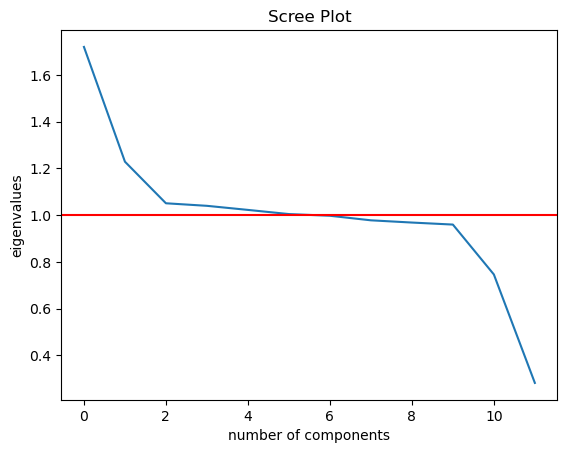

In [101]:
test_pca = X_stand_df
test_pca_normalized=(test_pca-test_pca.mean())/test_pca.std()
pca = PCA(n_components=test_pca.shape[1])
pca.fit(test_pca_normalized)
print(pca)

test_pca2 = pd.DataFrame(pca.transform(test_pca_normalized),columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
                                                                    'PC10', 'PC11', 'PC12'])


loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12'],
index=test_pca_normalized.columns)

cov_matrix = np.dot(test_pca_normalized.T, test_pca_normalized) / test_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.title('Scree Plot')
plt.show()

D3.  Identify the variance of each of the principal components identified in part D2.

To identify the variance of each PCA identified in D2 we have to run the PCA again with only 6 components and produce a new matrix. Once we have the PCA created we can then assign the explained_variance_ratio_ attribute. The numbers provided are percentage of variation of each principal component in decimal format.

In [102]:
# Instantiating data
reduced_pca = PCA(n_components = 6, random_state = 0)
# Fit and transform the PCA to X_stand
reduced_pca.fit(X_stand)
final_pca = reduced_pca.transform(X_stand)
# Create PCA Matrix, shows the weight that a feature contributes to each Principal Component
final_pca_matrix = pd.DataFrame(reduced_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"],
                               index=X_columns)
final_pca_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,-0.003058,-0.712542,0.129259,-0.064795,0.041323,-0.042849
Lng,0.007652,0.265927,-0.564164,-0.343004,-0.235515,0.001443
Population,-0.022811,0.629684,0.253543,0.234772,0.102756,-0.052169
Children,0.023338,-0.023013,0.350595,0.291952,-0.120302,0.448856
Age,0.705901,0.008656,-0.003164,-0.022226,0.009154,0.013231
Income,-0.022410,0.069845,0.088519,-0.137444,0.617901,0.477300
VitD_levels,0.019598,-0.021974,-0.080655,0.560328,-0.011810,-0.391113
Doc_visits,0.013893,0.013776,0.053630,0.048673,0.586993,-0.420891
Full_meals_eaten,0.027481,-0.111319,-0.299785,0.531893,-0.028745,0.033011
vitD_supp,0.019038,0.037972,0.338816,-0.343571,0.007754,-0.483289


In [103]:
list(reduced_pca.explained_variance_ratio_)

[0.14329551589301728,
 0.10240073568553089,
 0.08757786111482167,
 0.08667044956990405,
 0.08521515256145144,
 0.08373292555920943]

D4.  Identify the total variance captured by the principal components identified in part D2.

Provided below is a running total of the variance of each principal component. This shows that the 6 principal components are responsible for 59% of total variance. 

In [104]:
list(reduced_pca.explained_variance_ratio_.cumsum())

[0.14329551589301728,
 0.24569625157854819,
 0.3332741126933699,
 0.4199445622632739,
 0.5051597148247253,
 0.5888926403839347]

D5.  Summarize the results of your data analysis.

After running PCA on the continuous variables in the dataset we find that we can reduce the dimensionality from 12 variables to 6 principal compoents. This was verified by using the Kaiser rule and dropping components that fell below an eigen value of 1. The purpose of this assignment was to reduce the dimensionality of our dataset and I was successfully able to do that. 

In the end our 6 components were only able to explain 59% of the variance. I would have to attribute this to the fact that we probably aren't using a realistic dataset along with the variables chosen. 

In [87]:
# Create train and test sets from our final pca, which was already been fit and transformed
X_train, X_test, y_train, y_test = train_test_split(final_pca, y, train_size = 0.7, test_size=0.3, random_state = 0)
# Confirm that our train and test datasets are shaped correctly
print(X_train.shape)
print(X_test.shape)

(7000, 6)
(3000, 6)


In [88]:
# Instantiate DecisionTreeClassifier
classification_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_predicted = classification_model.predict(X_test)
# Check accuracy score
test_accuracy = accuracy_score(y_test, y_predicted)
print("The accuracy of the model")
print(test_accuracy) 
# Predict probabilities of the positive class
y_predicted_probability = classification_model.predict_proba(X_test)[:,1]
# Create confusion matrix
final_matrix = confusion_matrix(y_test, y_predicted)
# Print confusion matrix
print("\nThe confusion matrix for the Decision Tree Classifier")
print(final_matrix)
#Generate AUC score
print("\nThe Area Under the Curve (AUC) for the Decision Tree Classifier:")
#Print AUC score
print(roc_auc_score(y_test, y_predicted_probability))

The accuracy of the model
0.7143333333333334

The confusion matrix for the Decision Tree Classifier
[[1439  472]
 [ 385  704]]

The Area Under the Curve (AUC) for the Decision Tree Classifier:
0.6997367711653426


After confirming that our train and test datasets are correct in shape we can continue forward with our model. Once we create the model we check the accuracy score and find that it is 88.7% accurate.

To see how it performs with raw numbers we create a confusion matrix. The read this matrix we have to understand what the four numbers mean. The left side numbers (1,731 and 158) refer to predictions of no re-admission. The right side numbers (180 and 931) refer to predictions of re-admission. The top row numbers (1,731 and 180) are actual patient results of no re-admission while the bottom row numbers (158 and 931) are actual patient results of re-admission.

So from reading this matrix we can see that of the 3,000 patients predicted, 2,662 (1,731 + 931) were predicted correctly while the remaining 338 (180 + 158) were incorrectly predicted.

Finally, our Area Under the Curve score can be looked at for even more evidence of our model's strength in predicting patient re-admissions. Our score here is 88% which is a great score and provides evidence that our model is strong. 

In conclusion, I am somewhat shocked at these results. I have ran other prediction models on this dataset with similar accuracies. However, those analyses were using categorical data like health conditions and why the patient was hospitalized, in contrast to the continuous data of this dataset that for the most part seemingly should have no bearing on patient re-admission. Who would think that latitude and longitude could be used to predict patient re-admissions in this context? If there was something about where that person was living I would have to assume that it would result in one of the health conditions I mentioned as part of the categorical data analysis. 

This definitely makes me think about a possible next step for this dataset and predicting patient re-admissions with even higher accuracy. If we could analyze this dataset with continuous and categorical data we could probably design a very accurate model that would outperform this model with an 89% accuracy score and 88% AUC score.

Part V: Attachments

E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
 
I used information from the Datacamp modules, and my previous submissions in D206 and D212 Task 1 to help complete the coding in this assignment.

F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
 
Keita, Z. (2023). Principal Component Analysis in R Tutorial. https://datacamp.com/tutorial/pca-analysis-r